In [1]:
using ColoringNames
using JLD
using MLLabelUtils
using MLDataPattern
using Plots
using DataFrames
using Glob

In [29]:
df_spread = DataFrame(stddev=Float64[], stddev_in_bins=Float64[], perp=Float64[], mse_to_peak=Float64[], perp_sat=Float64[], perp_hue=Float64[], perp_val=Float64[])
for fn in glob(glob"../models/highdim/*/params.jld")
    res, std, output_res = load(fn, "dev_set_results", "splay_std_dev", "output_res")
    res[:stddev] = std
    res[:stddev_in_bins] = std*output_res
    push!(df_spread, res)
end

df_spread

,stddev,stddev_in_bins,perp,mse_to_peak,perp_sat,perp_hue,perp_val
1,0.00048828125,0.125,106.34957254065549,0.15443731140380534,163.6553840072539,60.017292011736096,122.46177567628935
2,0.0009765625,0.25,106.34739401829971,0.1522266670935704,163.6234382193236,60.01048603054044,122.49204867852269
3,0.001953125,0.5,106.40681300920937,0.15523803514734735,163.7007795389877,60.05061088805541,122.55756682542328
4,0.00390625,1.0,106.4013449783974,0.1625212202720671,163.75026349304022,60.040514246979654,122.52224402436457
5,0.0078125,2.0,106.53022973447423,0.15790264702217016,163.8609338915973,60.23723089710742,122.48366299908346
6,0.015625,4.0,107.11590619017376,0.17303364758149528,163.9272172929751,61.192529132252574,122.52153487545837


In [35]:
full_param_path = "../models/highdim/sib0.125/params.jld"
full_mdl = restore(TermToColorDistributionNetwork, full_param_path)

ColoringNames.TermToColorDistributionNetwork{311,SubString{String},TensorFlow.Tensor{Any}}(MLLabelUtils.LabelEnc.NativeLabels{SubString{String},311}(SubString{String}["acid","green","adobe","algae","almost","black","amber","amethyst","apple","apricot"  …  "vivid","vomit","warm","watermelon","weird","wheat","wine","wintergreen","wisteria","yuck"],Dict("topaz"=>290,"russet"=>255,"berry"=>34,"celery"=>86,"lipstick"=>199,"dull"=>139,"pink"=>21,"chocolate"=>93,"cerise"=>87,"egg"=>138…)),Session(Ptr{Void} @0x00007f2b83f115b0),<Tensor Group:1 shape=unknown dtype=Any>,4,256,128,16)

(h_max,s_max,v_max) = (0.234375,1.0,0.7890625)



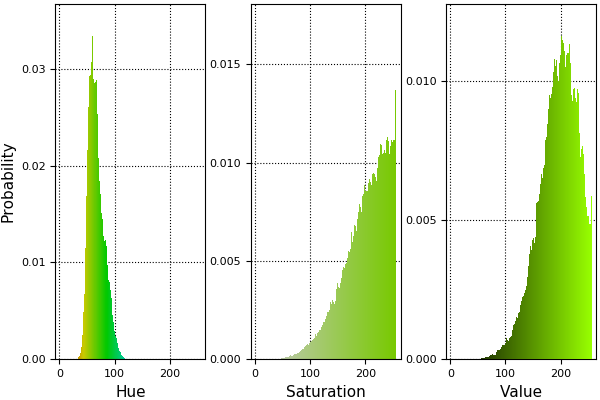

In [16]:
plot_hsv(query(full_mdl, "dark lime")...)

(h_max,s_max,v_max) = (0.234375,1.0,1.0)



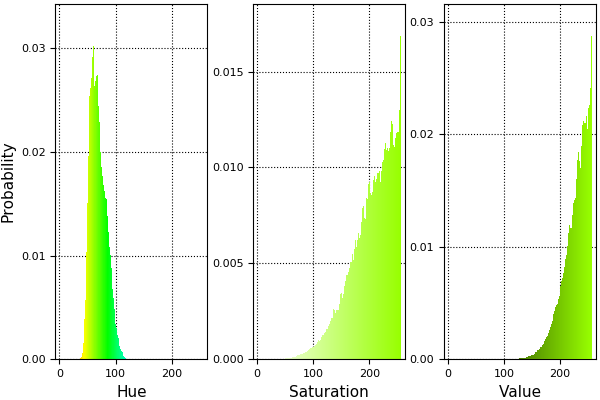

In [17]:
plot_hsv(query(full_mdl, "lime")...)

(h_max,s_max,v_max) = (0.03515625,0.390625,0.58984375)



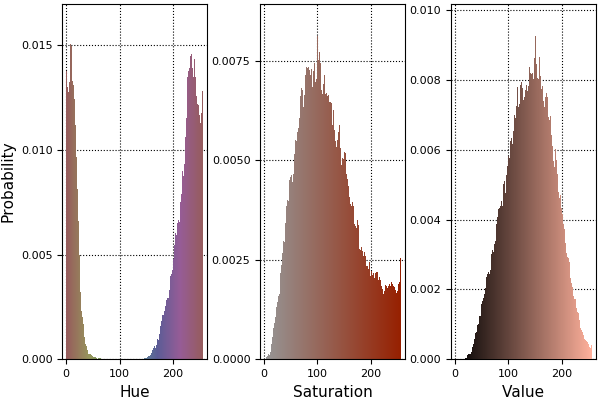

In [18]:
plot_hsv(query(full_mdl, "brownish purple")...)

(h_max,s_max,v_max) = (0.39453125,1.0,1.0)



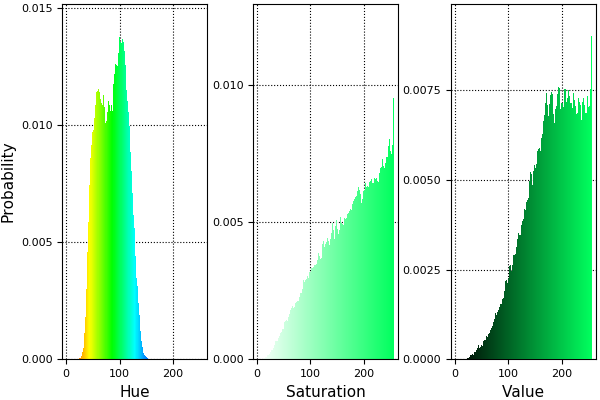